# Деревья поиска

* [Задача](#problem)
* [Обозначения](#legend)
* [Определения](#definition)
* [Операции](#operation)
  * [Поиск (search)](#search)
  * [Вставка (insert)](#insert)
  * [Удаление (delete)](#delete)

## Задача<a name="problem"></a>

Есть данные представленые в виде пар ключ-значение, где ключ из некоторого линейно упорядоченного множества, а значение для простоты можно представить в виде указателя на некоторую область памяти. Необходимо хранить эти пары так, чтобы оптимизировать доступ по ключу, а также иметь возможность выборки данных по диапазону ключей.

Очевидно, что интерес у данной задачи появляется, когда множество возможных ключей достаточно велико и не может быть размещено в памяти. Кроме того множество хранимых ключей также превышает доступные ресурсы или если это множество очень часто перестраивается. В противном случае множество пар можно хранить в виде отсортированного массива.

## Обозначения<a name="legend"></a>

* Для графа $G$ обозначим через $V(G)$ и $E(G)$ множества вершин и рёбер соответственно;
* Арностью вершины дерева будем называть количество её сыновей;
* Арностью дерева будем называть ограничение сверху на арность его вершин;
* Для бинарного дерева $T$ и его вершины $v \in V(T)$ обозначим через $v_l$ и $v_r$ её левого и правого сыновей соответственно;
* Для вершины дерева $v \in V(T)$ обозначим через $T_v$ поддерево исходного дерева с корнем в этой вершине;
* Для вершины бинарного дерева $v \in V(T)$ обозначим через $k(v)$ ключ пары, связанной с этой вершиной;

## Определения<a name="definition"></a>

Вообще деревья поиска по определению не ограничены в арности, но для простоты начнём с определения бинарного дерева поиска.

**Определение** Бинарное дерево $T$ называется деревом поиска, если для любой его вершины $v \in V(T)$ следует, что $k(u) \leqslant k(v)$ для любой вершины $u \in T_{v_l}$ и $k(w) \geqslant k(v)$ для любой вершины $w \in T_{v_r}$.

**Замечание** Важно отметить, что неравенства должны выполняться не только для сыновей вершины, но для любых вершин из поддеревьев этих сыновей. Действительно, давайте рассмотрим дерево со следующим ограничением: для любой вершины $v \in T$ следует, что $k(v_l) \leqslant k(v) \leqslant k(v_r)$. В таком дереве мы не сможем определить или хоть как-то сузить область поиска вершины. Мы даже не сможем предсказать местоположение минимума и максимума.

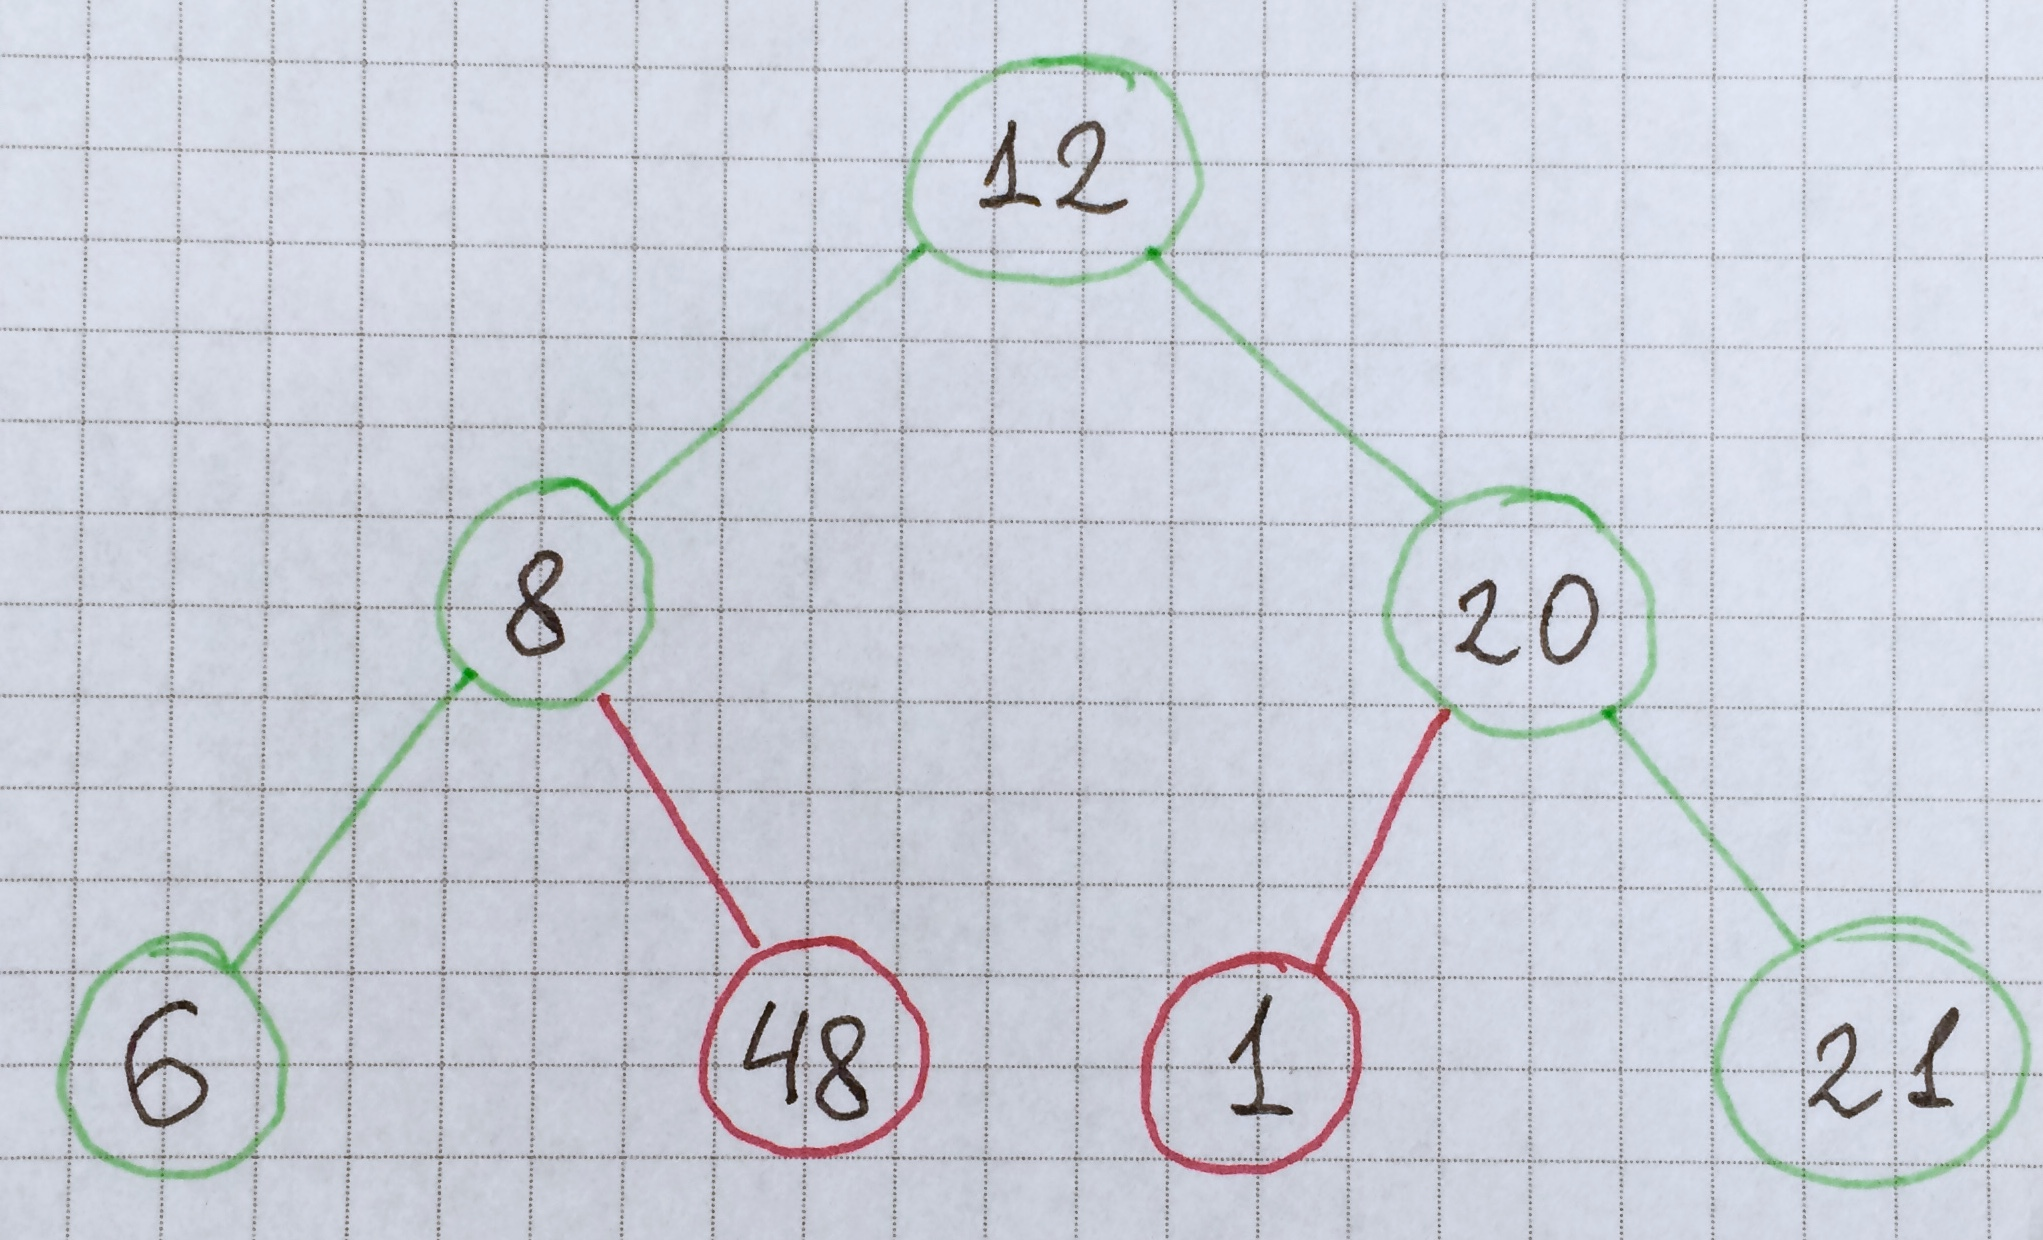

**Замечание** Также стоит прояснить по поводу нестрогих неравенств. Действительно, если у нас исключена возможность повторяющихся ключей, то неравенства можно заменить на строгие. Однако, часто возникает потребность хранить пары с одинаковыми ключами (например, индекс по дате создания или чему-то ещё не уникальному). В таком случае можно ослабить только одно неравенство. Но для возможности балансировки дерева нам необходимо ослабить оба неравенства. Конечно, при таких ослаблениях понадобится дополнительная работа для поиска всех значений по ключу.

Теперь можно попробовать перейти к общему случаю с неограниченной арностью дерева. В этом случае с каждой вершиной $v \in V(T)$ связана не одна пара ключ-значение, а несколько (точнее $\mathrm{arn}(v) - 1$, где $\mathrm{arn}(v)$ — арность вершины $v$). Пусть $\mathrm{arn}(v) = n + 1$, ключи отсортированы и пронумерованы следующим образом: $k_1 < k_2 < \ldots < k_n$, а поддеревья обозначим как $\alpha_0, \alpha_1, \ldots, \alpha_n$. Тогда

**Определение** Это дерево является деревом поиска, если для любого $i \in 1..n$ следует, что $k_{i-1} \leqslant k(u) \leqslant k_i$, для любого $u \in \alpha_i$.

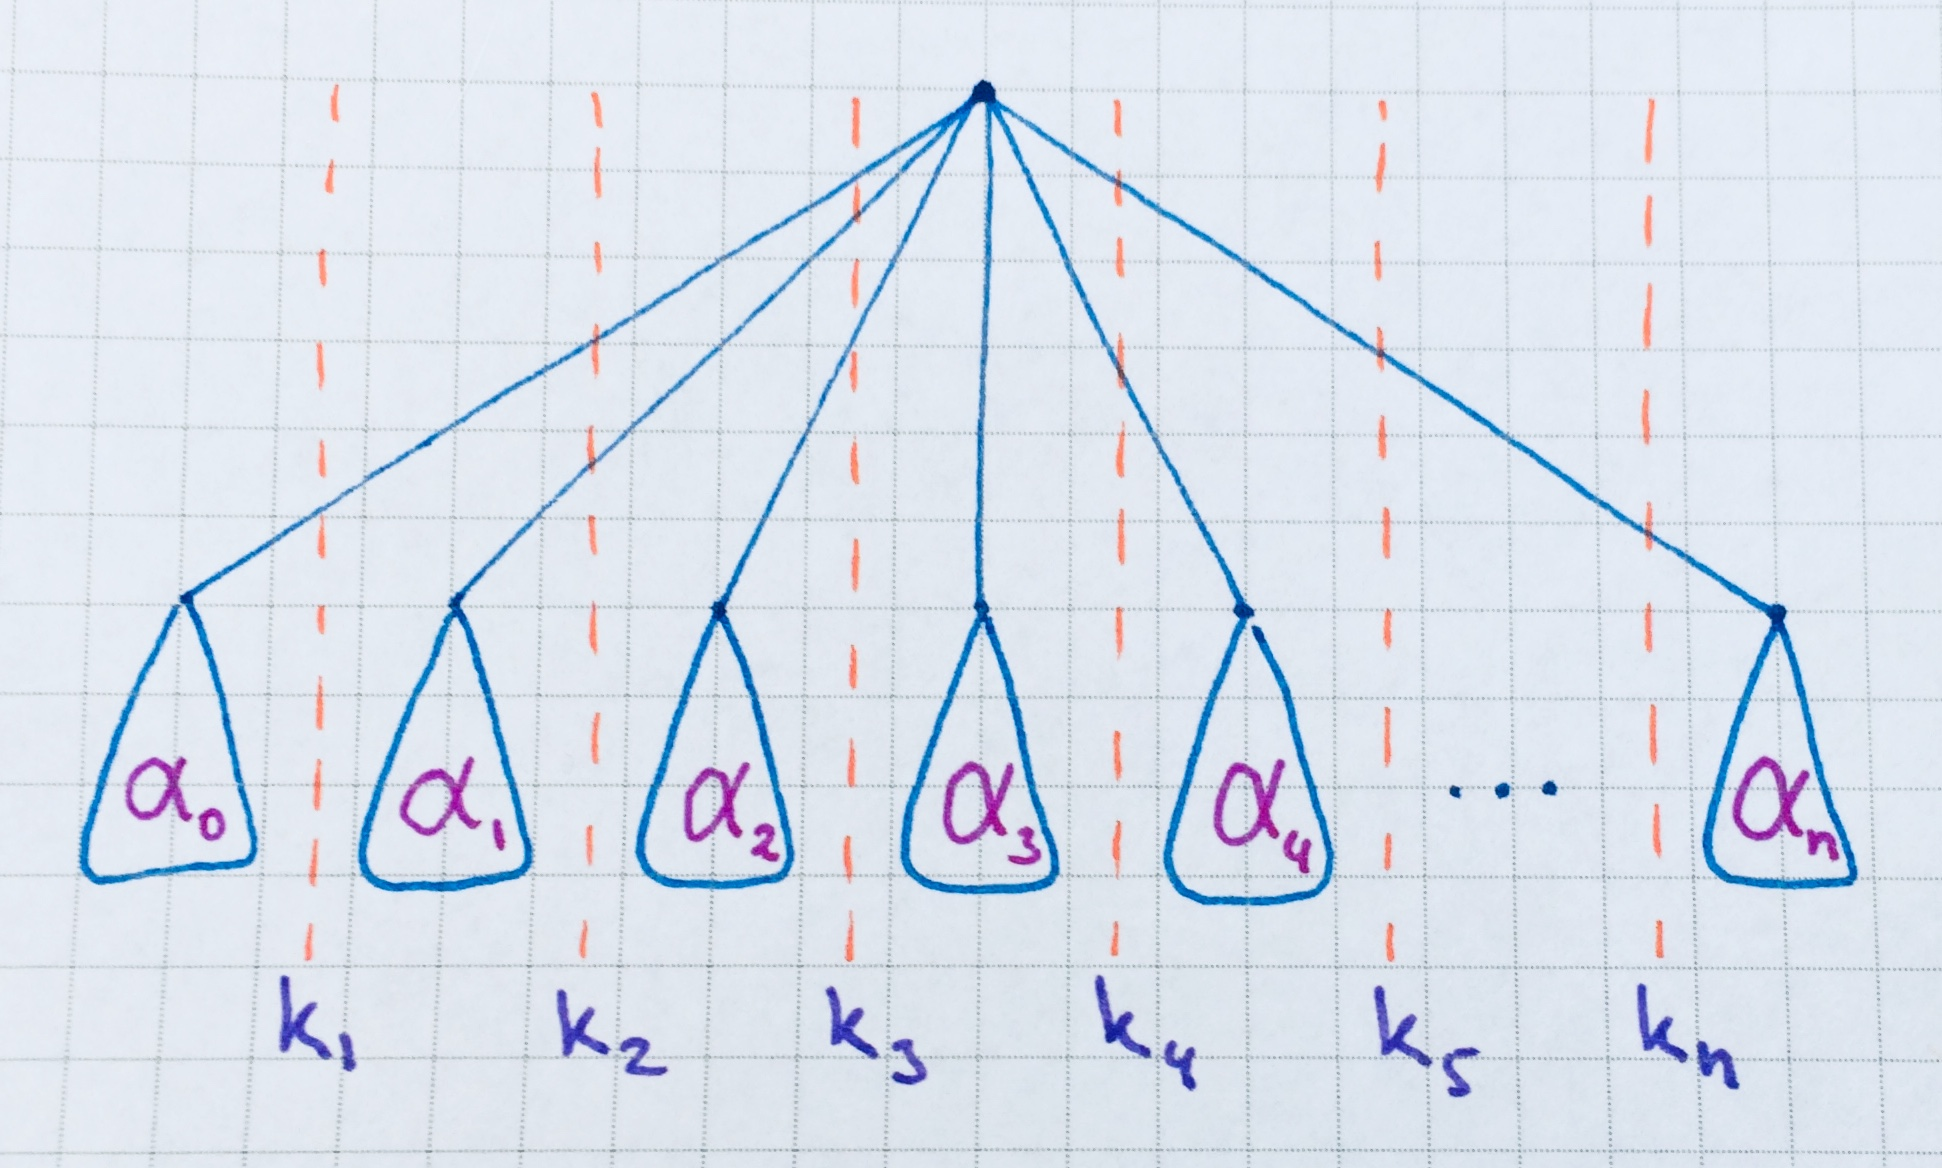

**Замечание** Конечно, в таком определении кроется подвох: совершенно непонятно что делать, если арность вершины равна 1. Собственно большинство реализаций деревьев с высокой арностью избегают данного случая.

## Операции<a name="operation"></a>

### Поиск (search)<a name="search"></a>

Поиск это одна из основополагающих операций деревьев поиска, ведь не даром она есть даже в их названии. Рассмотрим псевдокод для бинарного дерева в случае неповторяющихся ключей. Данная функция рекурсивно выполняется от корня дерева.
```python
def search(v, key):
    if k(v) == key:
        return v
        
    if k(v) < key:
        return search(v_l, key)
        
    return search(v_r, key)
```

Сложность этой операции будет зависеть от глубины искомой вершины $O(h(v)) \leqslant O(h(T))$.

### Вставка (insert)<a name="insert"></a>

Вставка по сути сводится к операции поиска с добавлением отсутствующего сына или заменой существующего значения. Сложность также будет зависеть от глубины расположения вершины после операции $O(h(v)) \leqslant O(h(T))$.

### Удаление (delete)<a name="delete"></a>

Удаление начинается с поиска, после которого необходимо перестроить дерево так, чтобы оно осталось деревом поиска, но кроме того осталось бинарным. В качестве самого простого решения можно использовать следующее. Пусть мы удалем некоторую вершину $v \in V(T)$, а $\alpha$ и $\beta$ поддеревья её левого и правого сыновей соответственно. Тогда вместо вершины $v$ подставим её дерево левого сына, а дерево правого сына прикрепим как правого сына максимума поддерева $\alpha$.

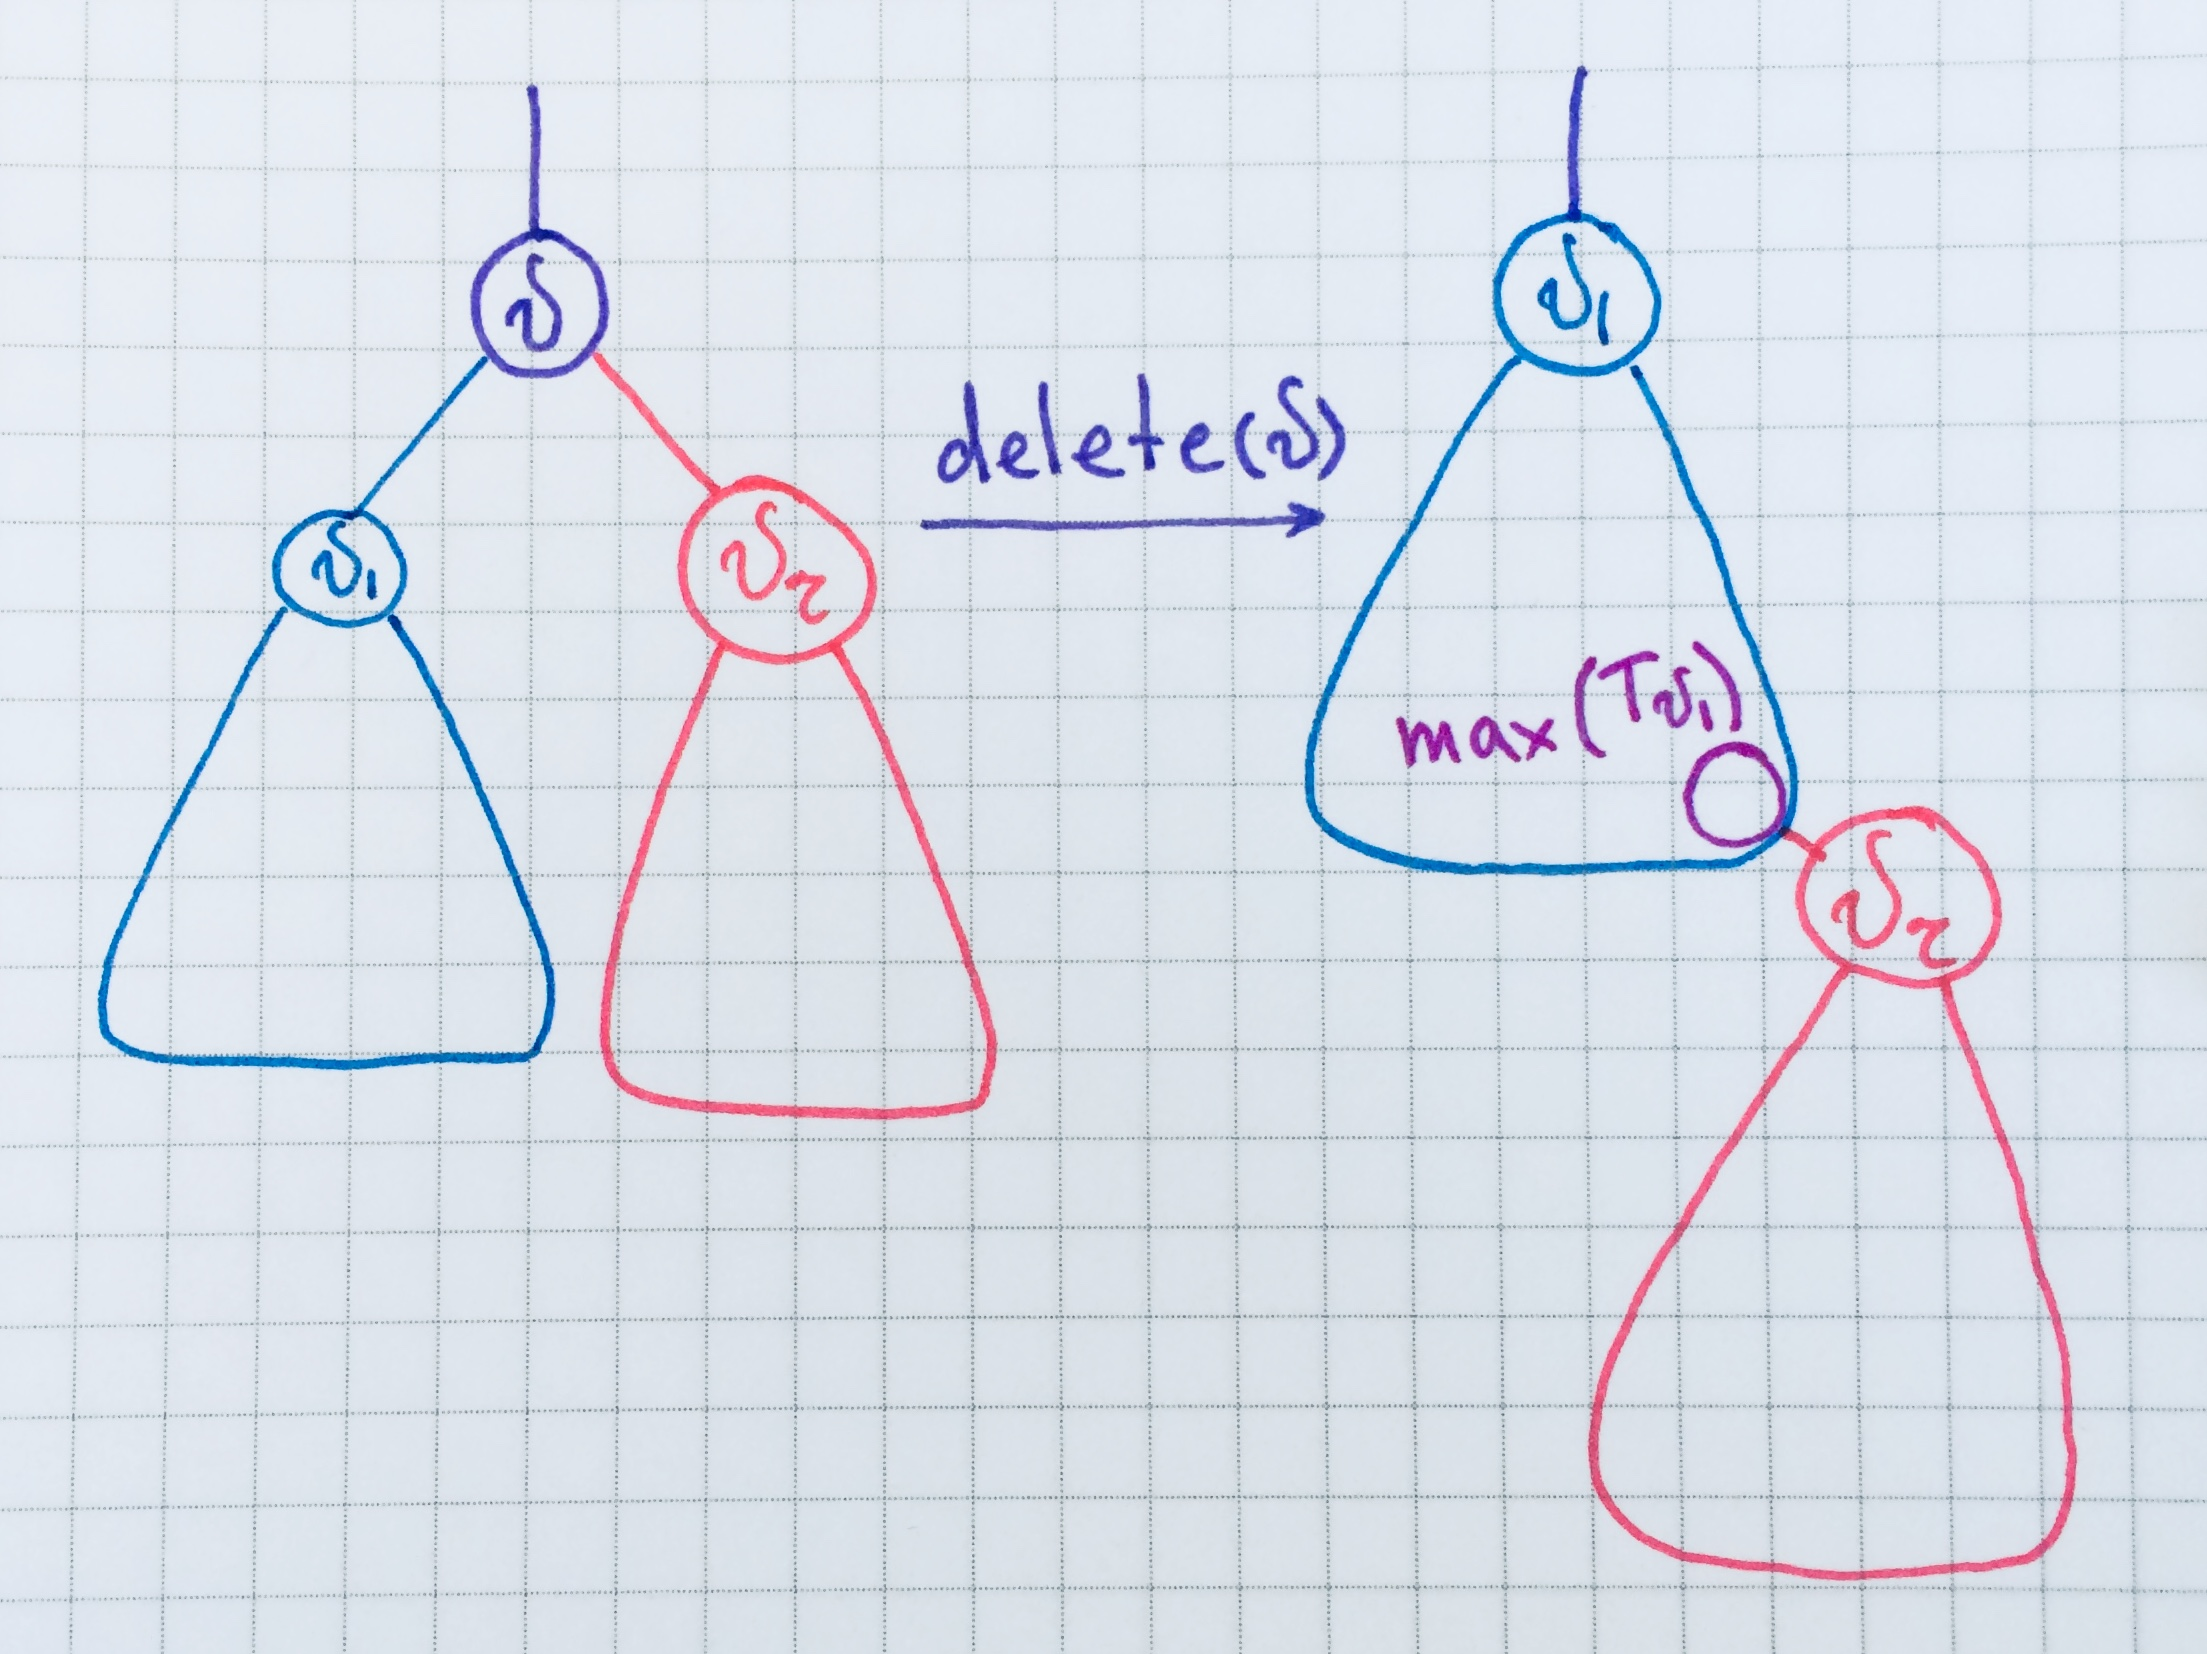

Очевидно что при таком удалении ни о каком поддержании баланса дерева и речи не идёт, однако, этот способ имеет применение, как мы увидим позже.